In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squarify as sq
import matplotlib.cm as cm

In [ ]:
data= pd.read_csv("Supply_Chain_Shipment_Pricing_Data.csv")
data.head(5)

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN


In [ ]:
data.shape

(10324, 33)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10324 non-null  int64  
 1   project code                  10324 non-null  object 
 2   pq #                          10324 non-null  object 
 3   po / so #                     10324 non-null  object 
 4   asn/dn #                      10324 non-null  object 
 5   country                       10324 non-null  object 
 6   managed by                    10324 non-null  object 
 7   fulfill via                   10324 non-null  object 
 8   vendor inco term              10324 non-null  object 
 9   shipment mode                 9964 non-null   object 
 10  pq first sent to client date  10324 non-null  object 
 11  po sent to vendor date        10324 non-null  object 
 12  scheduled delivery date       10324 non-null  object 
 13  d

In [ ]:
data.isna().sum()

id                                 0
project code                       0
pq #                               0
po / so #                          0
asn/dn #                           0
country                            0
managed by                         0
fulfill via                        0
vendor inco term                   0
shipment mode                    360
pq first sent to client date       0
po sent to vendor date             0
scheduled delivery date            0
delivered to client date           0
delivery recorded date             0
product group                      0
sub classification                 0
vendor                             0
item description                   0
molecule/test type                 0
brand                              0
dosage                          1736
dosage form                        0
unit of measure (per pack)         0
line item quantity                 0
line item value                    0
pack price                         0
u

Freight cost and Weight coulmn Processing.

In [ ]:
#id is paired with corresponding values in weight/freight_cost and stored as a dict
id_weight = dict(zip(data['id'],data['weight (kilograms)']))
id_freight = dict(zip(data['id'],data['freight cost (usd)']))

In [ ]:
#defining function to extract the id number from string
def get_weight(data):

  #All numeric values converted to numeric type
    data = pd.to_numeric(data, errors = 'ignore')

    if type(data) == str:
        try:
   #If data is string, it is split from starting of ':' and storing id number to e.
            d = data.split(':')
            e = d[1][:-1]
  #returning the corresponding values with reference to id number
            return id_weight.get(int(e))
        except:
            return (data)
    else:
        return (data)

def get_freight(data):
    data = pd.to_numeric(data, errors = 'ignore')
    if type(data) == str:
        try:
            d = data.split(':')
            e = d[1][:-1]
            return id_freight.get(int(e))
        except:
            return (data)
    else:
        return (data)

In [ ]:
#Applying the function to both weight/freight cost columns
data['weight (kilograms)'] = data['weight (kilograms)'].apply(get_weight)
data['freight cost (usd)'] = data['freight cost (usd)'].apply(get_freight)

In [ ]:
#converting all values in column to numeric type and errors wil be set as NaN
data['weight (kilograms)'] = pd.to_numeric(data['weight (kilograms)'], errors = 'coerce')
data['freight cost (usd)'] = pd.to_numeric(data['freight cost (usd)'], errors = 'coerce')

In [ ]:
#filling the NaN values with mean
data['weight (kilograms)'] = data['weight (kilograms)'].fillna(data['weight (kilograms)'].mean())
data['freight cost (usd)'] = data['freight cost (usd)'].fillna(data['freight cost (usd)'].mean())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10324 non-null  int64  
 1   project code                  10324 non-null  object 
 2   pq #                          10324 non-null  object 
 3   po / so #                     10324 non-null  object 
 4   asn/dn #                      10324 non-null  object 
 5   country                       10324 non-null  object 
 6   managed by                    10324 non-null  object 
 7   fulfill via                   10324 non-null  object 
 8   vendor inco term              10324 non-null  object 
 9   shipment mode                 9964 non-null   object 
 10  pq first sent to client date  10324 non-null  object 
 11  po sent to vendor date        10324 non-null  object 
 12  scheduled delivery date       10324 non-null  object 
 13  d

In [ ]:
data.shape

(10324, 33)

In [ ]:
data.isna().sum()

id                                 0
project code                       0
pq #                               0
po / so #                          0
asn/dn #                           0
country                            0
managed by                         0
fulfill via                        0
vendor inco term                   0
shipment mode                    360
pq first sent to client date       0
po sent to vendor date             0
scheduled delivery date            0
delivered to client date           0
delivery recorded date             0
product group                      0
sub classification                 0
vendor                             0
item description                   0
molecule/test type                 0
brand                              0
dosage                          1736
dosage form                        0
unit of measure (per pack)         0
line item quantity                 0
line item value                    0
pack price                         0
u

In [ ]:
data.describe()

,id,unit of measure (per pack),line item quantity,line item value,pack price,unit price,weight (kilograms),freight cost (usd),line item insurance (usd)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,4464.293407,12641.908460,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,12269.209690,16541.716065,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.750000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,396.000000,3314.030000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,2116.000000,9457.550000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,4464.293407,13210.207500,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,857354.000000,289653.200000,7708.440000


###Country

Text(0, 0.5, 'Frequency')

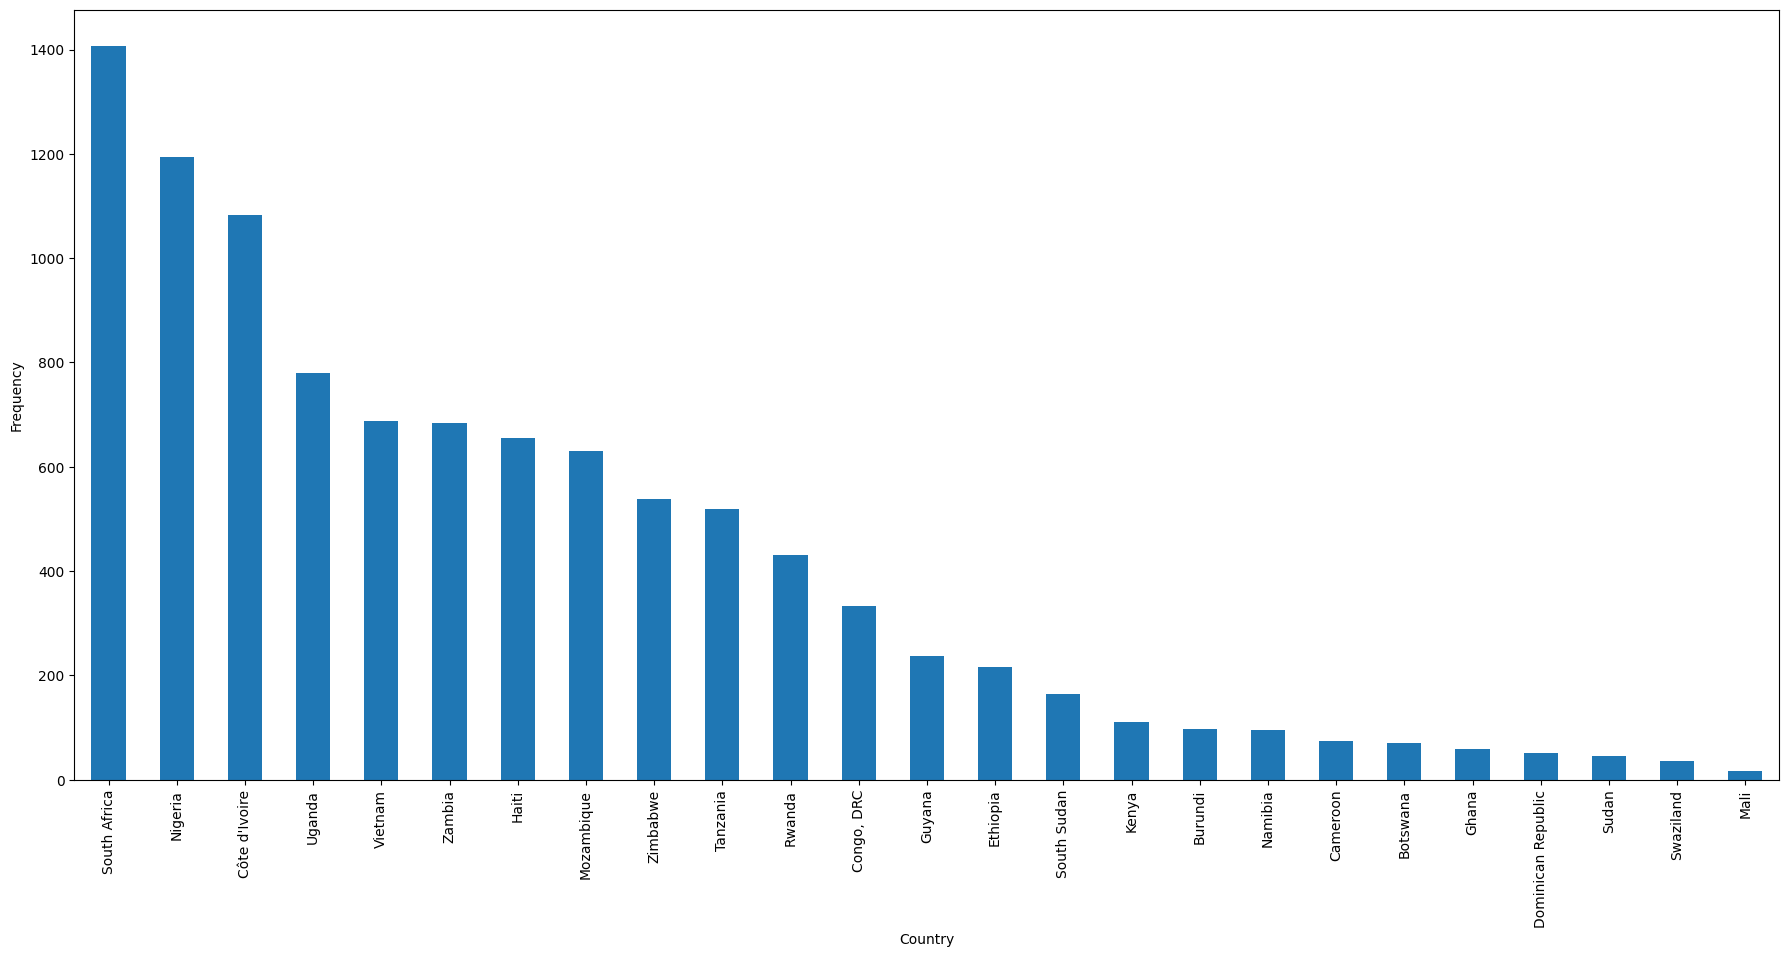

In [ ]:
plt.figure(figsize=(22,10))
data['country'].value_counts().nlargest(25).plot.bar()
plt.xlabel('Country')
plt.ylabel('Frequency')

Top 25 countries to which antiretroviral and HIV lab shipments are imported

###Dosage form

Text(0, 0.5, 'Frequency')

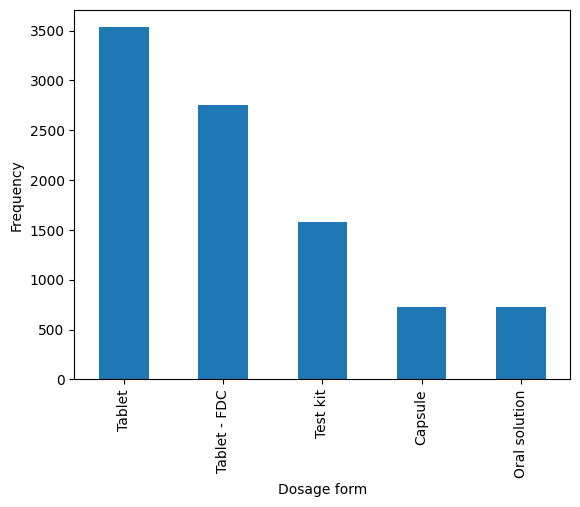

In [ ]:
data['dosage form'].value_counts().head().plot.bar()
plt.xlabel('Dosage form')
plt.ylabel('Frequency')

It can be observed that most dosage are in Tablet form.

###Shipment Mode

<Axes: ylabel='shipment mode'>

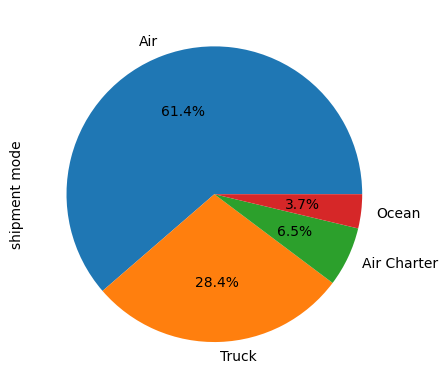

In [ ]:
data['shipment mode'].value_counts().plot.pie(autopct="%1.1f%%")

Most preferred shipment mode is Air.

###Manufacturing site

manufacturing site
Aurobindo Unit III, India         3172
Mylan (formerly Matrix) Nashik    1415
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  665
Strides, Bangalore, India.         540
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
ABBVIE (Abbott) Logis. UK          219
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

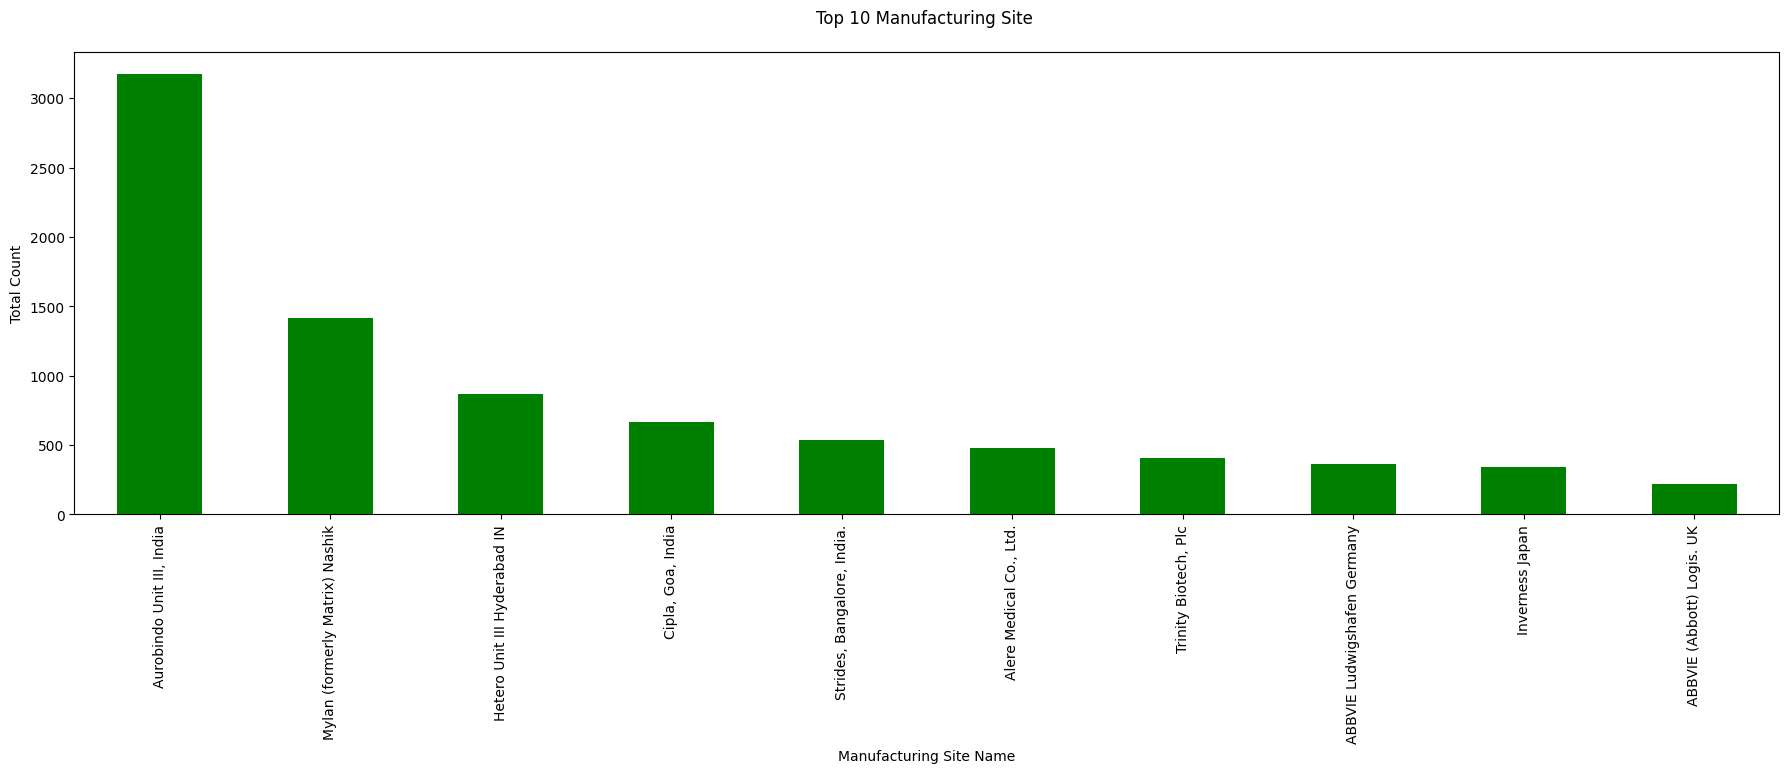

In [ ]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=data.groupby('manufacturing site').size().nlargest(10)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='bar',color='green')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

Top 5 manufacturing sites are from India.

###First line designation

Text(0.5, 0, 'First Line Designation')

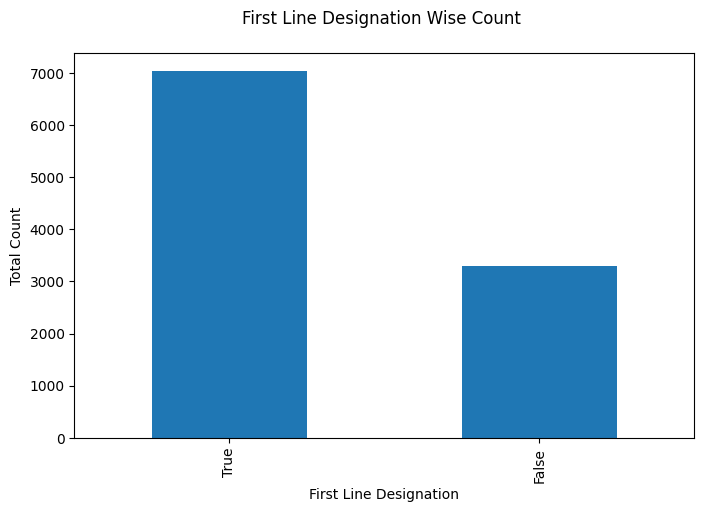

In [ ]:
plt.figure(figsize=(8,5))
data['first line designation'].value_counts().plot.bar()
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')

It indicates the point where antiretroviral and HIV are first recieved or processed after leaving the manufacturing site.






###Dosage form vs Country

In [ ]:
data.country.value_counts().head()

South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Name: country, dtype: int64

In [ ]:
data['dosage form'].value_counts().head()

Tablet           3532
Tablet - FDC     2749
Test kit         1575
Capsule           729
Oral solution     727
Name: dosage form, dtype: int64

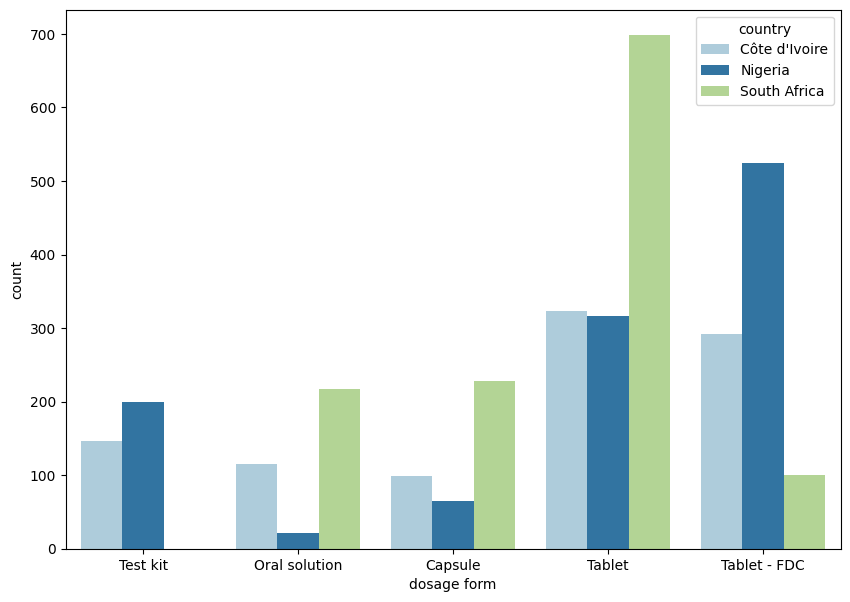

In [ ]:
specific_val = ["South Africa","Nigeria","Côte d'Ivoire"]
filt_rows = data[data['country'].isin(specific_val)]
specific_dos=['Tablet','Tablet - FDC','Test kit','Capsule','Oral solution']
dos = filt_rows[filt_rows['dosage form'].isin(specific_dos)]
plt.figure(figsize=(10,7))
sns.countplot(x='dosage form',data=dos,hue='country',palette='Paired')
plt.show()

This is the plot which shows the most popular 3 countries which importing top 5 dosage form

###Shipment mode vs Manufacturing site

Top 10 Air Manufacturing Site 

Aurobindo Unit III, India         1694
Mylan (formerly Matrix) Nashik     695
Alere Medical Co., Ltd.            473
Hetero Unit III Hyderabad IN       417
Trinity Biotech, Plc               383
Inverness Japan                    320
ABBVIE Ludwigshafen Germany        285
Cipla, Goa, India                  274
Strides, Bangalore, India.         256
ABBVIE (Abbott) Logis. UK          150
Name: manufacturing site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

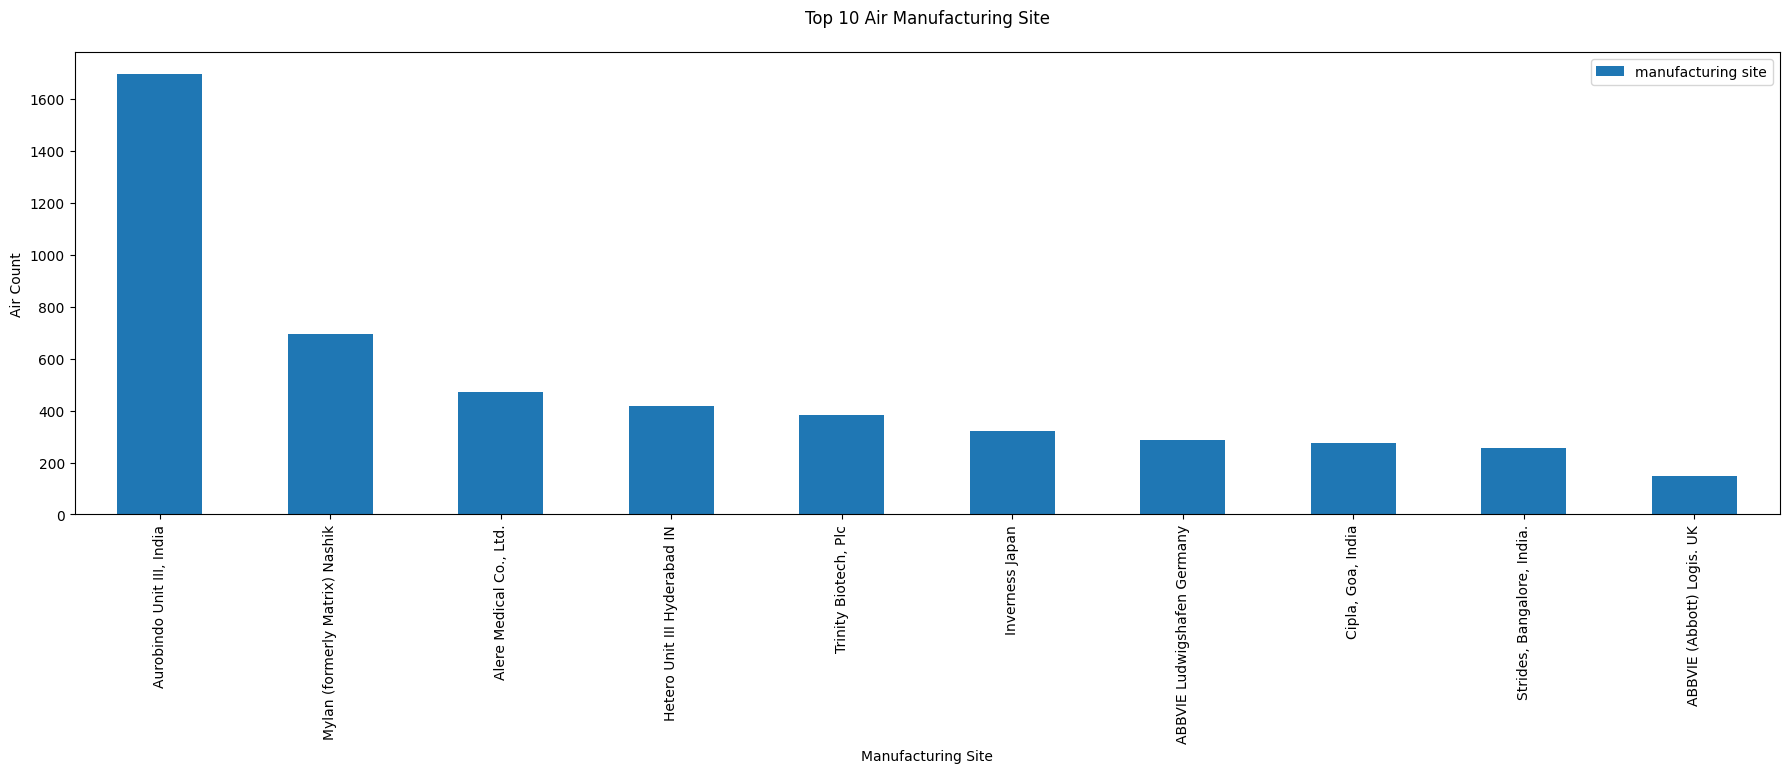

In [ ]:
ItemData=data[data['shipment mode']=='Air']
data[data["shipment mode"]=='Air']['manufacturing site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = data[data["shipment mode"]=='Air']['manufacturing site'].value_counts()[0:10]
print("Top 10 Air Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Air Manufacturing Site\n')
plt.ylabel('Air Count')
plt.xlabel('Manufacturing Site')

These are the top 10 manufacturing sites that are using air as shipment mode

###Dosage form vs Country

Top 10 Tablet Transporting country 

South Africa     698
Vietnam          366
Côte d'Ivoire    323
Uganda           322
Nigeria          316
Zambia           294
Mozambique       176
Haiti            174
Tanzania         162
Rwanda           151
Name: country, dtype: int64


Text(0.5, 0, 'Country')

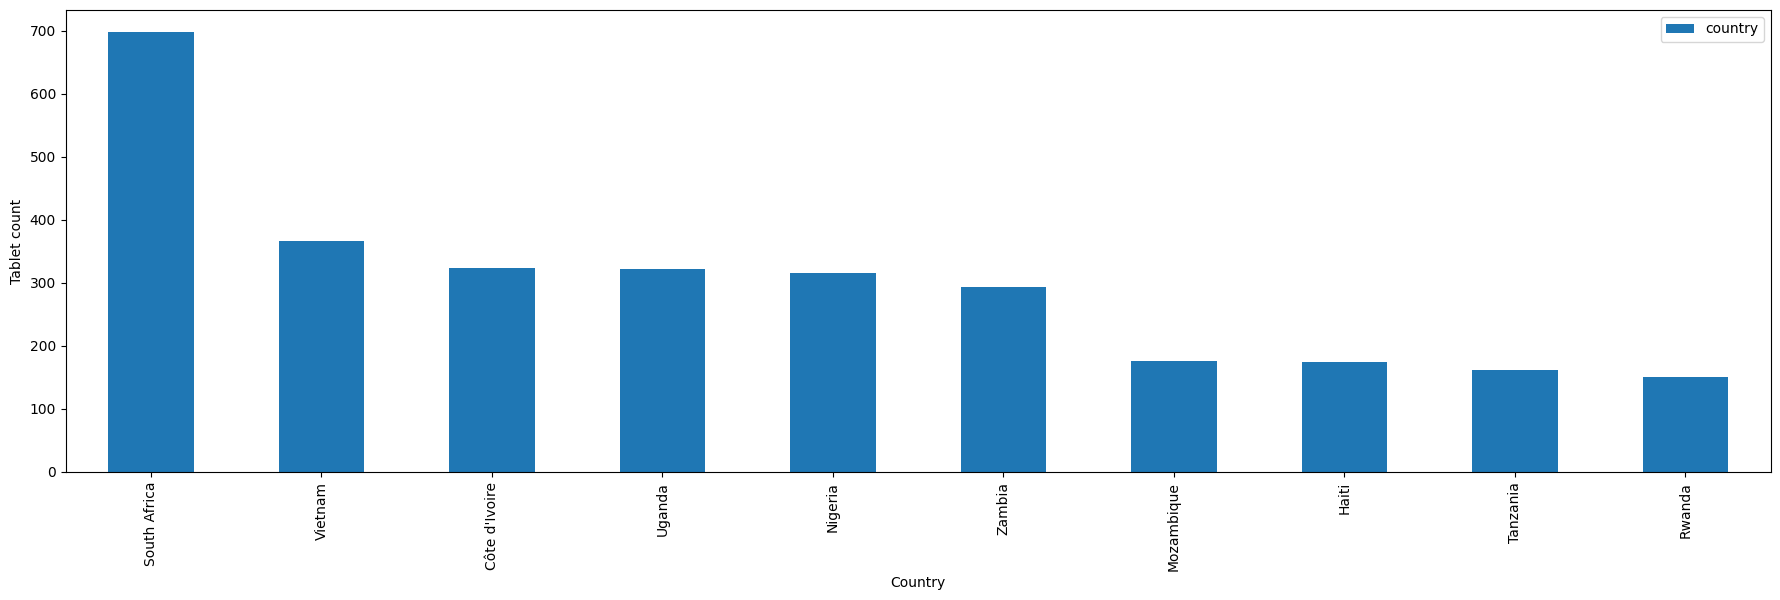

In [ ]:
ItemData=data[data['dosage form']=='Tablet']
data[data["dosage form"]=='Tablet']['country'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = data[data["dosage form"]=='Tablet']['country'].value_counts()[0:10]
print("Top 10 Tablet Transporting country \n")
print(ItemSupplier)
plt.ylabel('Tablet count')
plt.xlabel('Country')

These are the top 10 countries where Tablet are importing in large scale

###Scheduled  delivery date vs delivered to client date

In [ ]:
data['scheduled delivery date'] = pd.to_datetime(data['scheduled delivery date'])

In [ ]:
data['scheduled delivery date'].value_counts().head()

2014-08-29    97
2012-03-16    83
2014-08-27    63
2010-05-31    62
2014-01-31    60
Name: scheduled delivery date, dtype: int64

In [ ]:
data['delivered to client date'] = pd.to_datetime(data['delivered to client date'])

In [ ]:
data['delivered to client date'].value_counts().head()

2014-08-29    74
2014-08-27    66
2010-06-28    60
2012-02-14    60
2013-04-16    59
Name: delivered to client date, dtype: int64

Text(0.5, 1.0, 'scheduled delivery date vs delivered to client date')

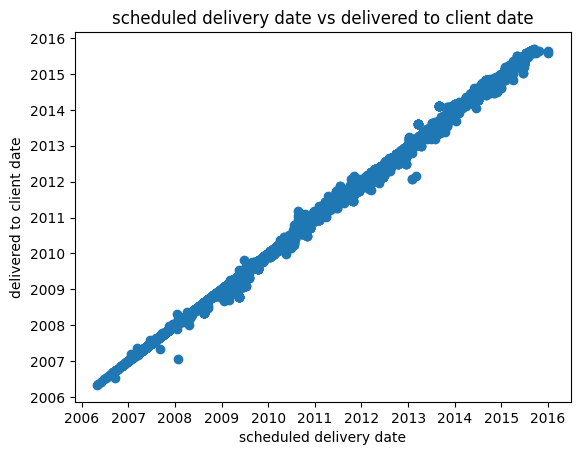

In [ ]:
plt.scatter(data['scheduled delivery date'],data['delivered to client date'])
plt.xlabel('scheduled delivery date')
plt.ylabel('delivered to client date')
plt.title('scheduled delivery date vs delivered to client date')

In [ ]:
data['delay'] = data['scheduled delivery date'] - data['delivered to client date']
data['delay'] = data['delay'].dt.days

In [ ]:
data.groupby('country')['delay'].nlargest(10)

country           
Afghanistan  3595       0
             4262       0
             6093       0
Angola       1239       0
             1865       0
                     ... 
Zimbabwe     6853     139
             6784     111
             8626     111
             9573     111
             10082    111
Name: delay, Length: 344, dtype: int64

Guyana have an average product delay of 17 days

In [ ]:
data['product group'].value_counts().to_frame()

,product group
ARV,8550
HRDT,1728
ANTM,22
ACT,16
MRDT,8


<Axes: >

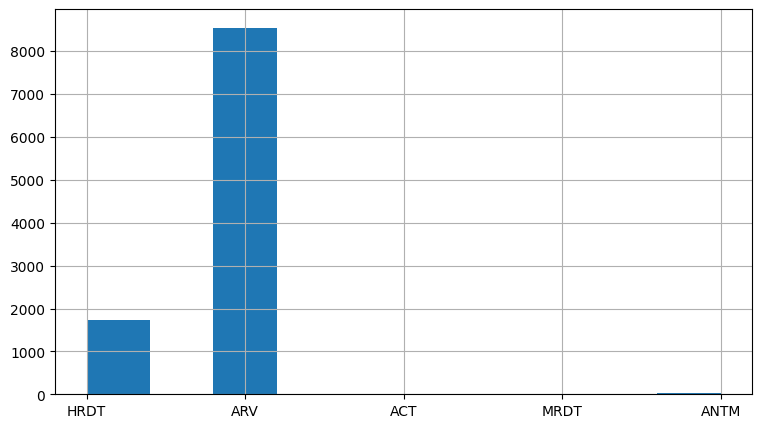

In [ ]:
data['product group'].hist(figsize=[9,5])

Text(0, 0.5, 'Freight cost')

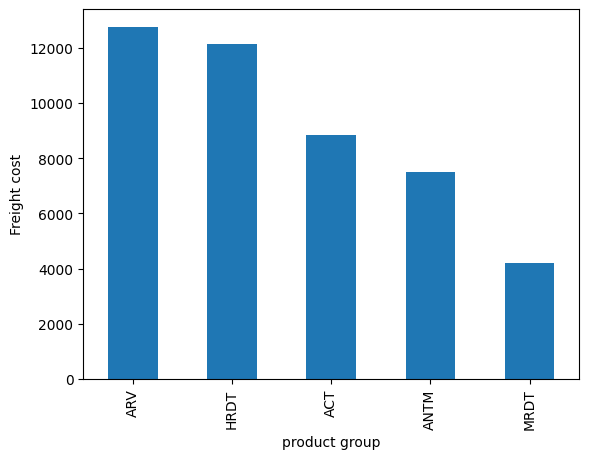

In [ ]:
data.groupby('product group')['freight cost (usd)'].mean().sort_values(ascending=False).plot.bar()
plt.xlabel('product group')
plt.ylabel('Freight cost')

Air            2399
Truck          1434
Air Charter     376
Ocean           266
Name: shipment mode, dtype: int64

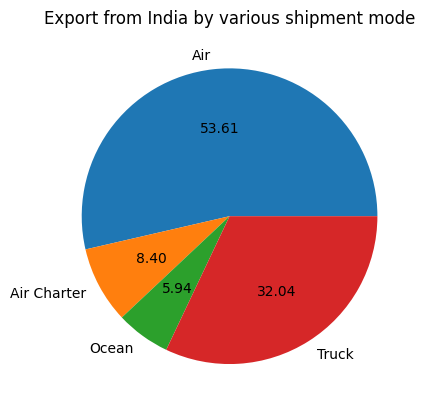

In [ ]:
ind = data[data['manufacturing site'].str.contains('India', na = False)]
plt.title('Export from India by various shipment mode')
ind.groupby('shipment mode').size().plot(kind='pie',autopct='%.2f')
plt.xticks(rotation = 90)
ind['shipment mode'].value_counts()

Air shipment mode is used higher for shipping commodities from india


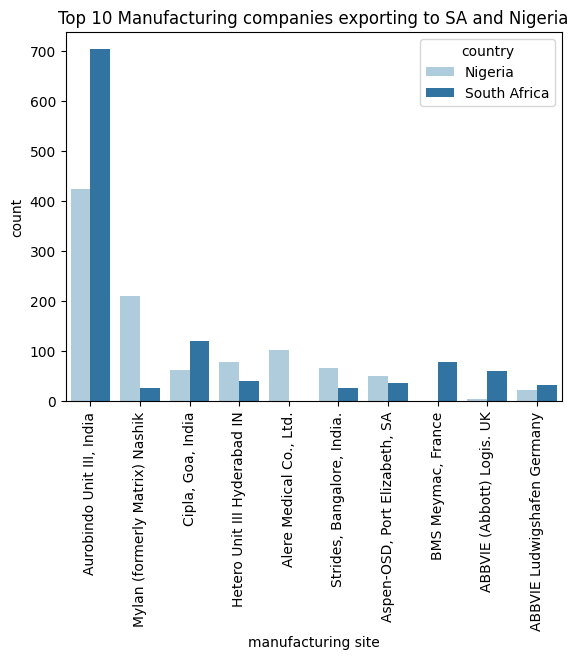

In [ ]:
c_filter = ["South Africa",'Nigeria']
f2 = data[data['country'].isin(c_filter)]
sns.countplot(x='manufacturing site',data=f2,hue='country',palette='Paired',order = f2['manufacturing site'].value_counts().iloc[:10].index)
plt.title('Top 10 Manufacturing companies exporting to SA and Nigeria')
plt.xticks(rotation =90)
plt.show()

Aurobindo unit II from india exports more
 to south africa and nigeria


<ipython-input-178-a8a7181ae234>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f2['delivered to client date' ]= pd.to_datetime(f2['delivered to client date'])
<ipython-input-178-a8a7181ae234>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f2['Year'] = f2['delivered to client date'].dt.year


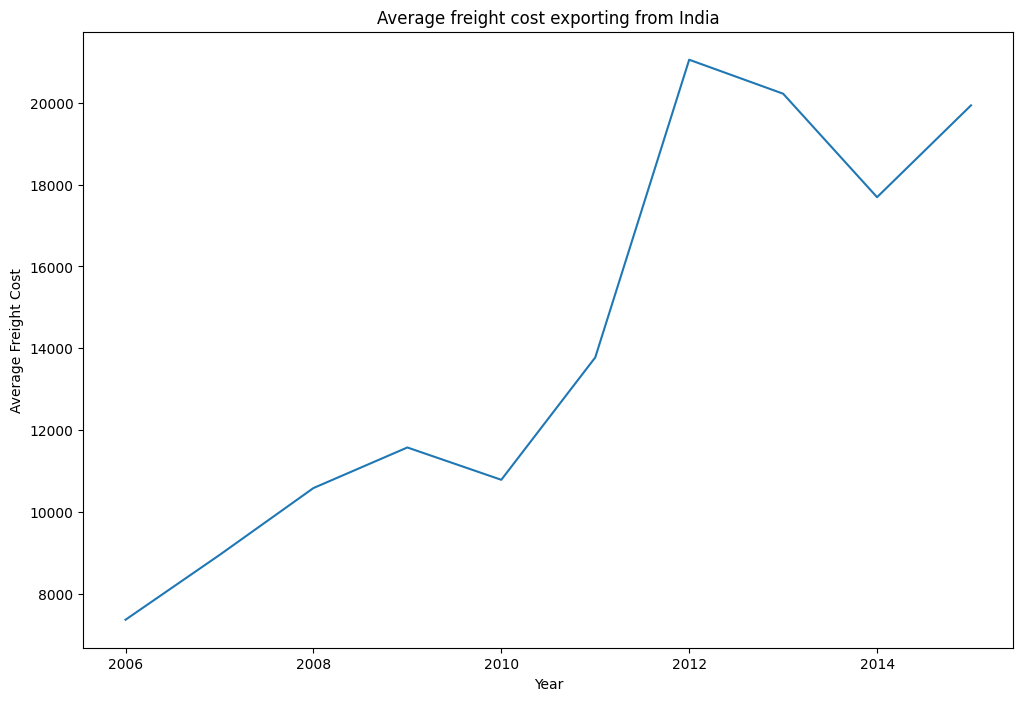

In [ ]:
f2['delivered to client date' ]= pd.to_datetime(f2['delivered to client date'])
f2['Year'] = f2['delivered to client date'].dt.year
plt.figure(figsize=(12,8))
f2.groupby('Year')['freight cost (usd)'].mean().plot()
plt.title('Average freight cost exporting from India')
plt.ylabel('Average Freight Cost')
plt.show()

average freight cost in india is increasing every year.

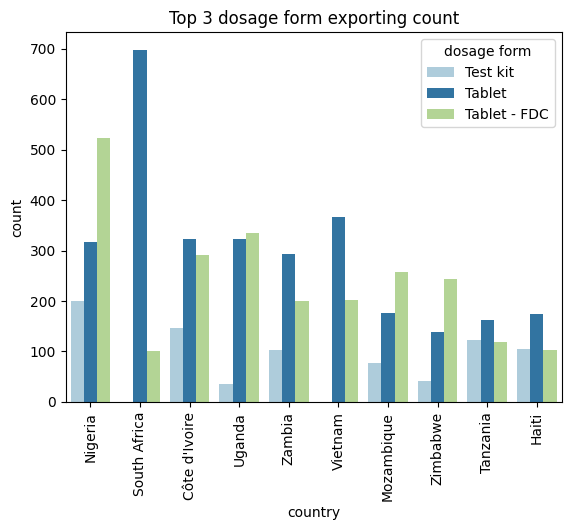

In [ ]:
d_filter = ["Tablet",'Tablet - FDC','Test kit']
f3 = data[data['dosage form'].isin(d_filter)]
sns.countplot(x='country',data=f3,hue='dosage form',palette='Paired',order = f3['country'].value_counts().nlargest(10).index)
plt.title('Top 3 dosage form exporting count')
plt.xticks(rotation =90)
plt.show()

Total count of top 3 dosage form (Test kit,Tablet,Tablet - FDC) exporting to 10 countries


2014    698
2010    642
2009    601
2011    512
2012    496
2008    482
2013    470
2007    376
2015    363
2006     29
Name: delivered to client date, dtype: int64

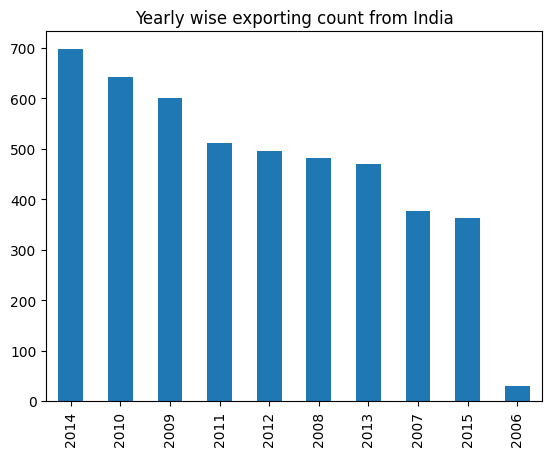

In [ ]:
ind['delivered to client date'].dt.year.value_counts().plot.bar()
plt.title('Yearly wise exporting count from India')
ind['delivered to client date'].dt.year.value_counts()

In [ ]:
data['weight (kilograms)'].describe()

count     10324.000000
mean       4464.293407
std       12269.209690
min           0.000000
25%         396.000000
50%        2116.000000
75%        4464.293407
max      857354.000000
Name: weight (kilograms), dtype: float64

###Top 10 countries having maximum freight cost average

In [ ]:
temp = data.groupby('country')['freight cost (usd)'].mean().sort_values(ascending=False)

In [ ]:
colormap = 'RdPu'
norm = plt.Normalize(min(temp.nlargest(10).values), max(temp.nlargest(10).values))
color_codes = cm.ScalarMappable(norm=norm, cmap=colormap).to_rgba(temp.nlargest(10).values)

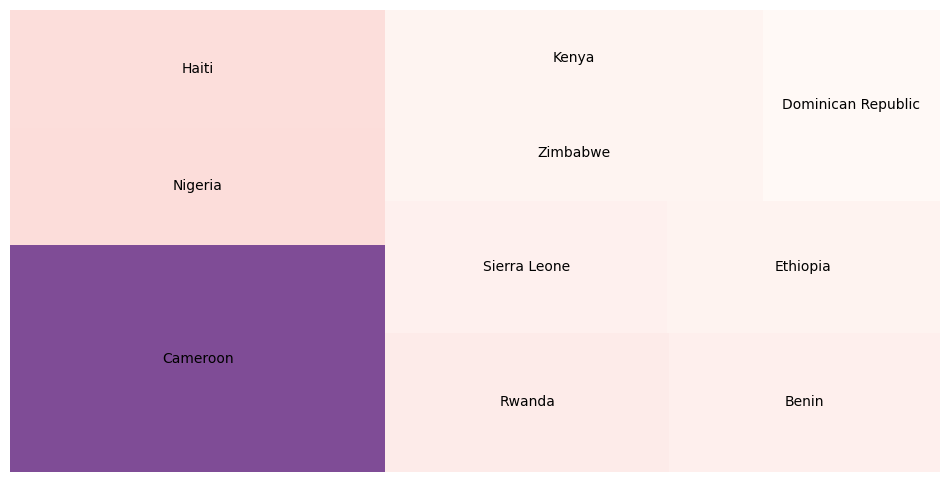

In [ ]:
plt.figure(figsize=(12,6))
plt.rc('font', size=10)
sq.plot(sizes=temp.nlargest(10).values, label=temp.nlargest(10).index,
              color=color_codes, alpha=0.7)
plt.axis('off')
plt.show()

Cameroon have the highest average in freight cost

Top 10 manufacturing sites having maximum average freight cost

In [ ]:
temp = data.groupby('manufacturing site')['freight cost (usd)'].mean().sort_values(ascending=False)

Text(0, 0.5, 'Average of freight cost')

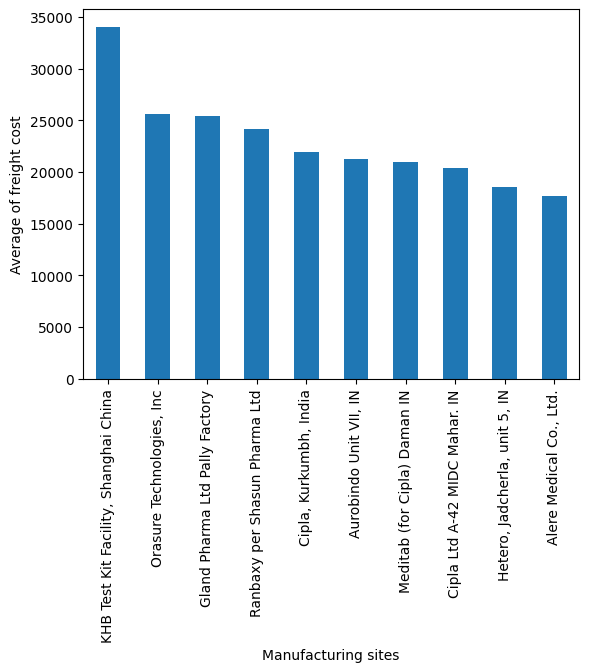

In [ ]:
temp.nlargest(10).plot.bar()
plt.xlabel('Manufacturing sites')
plt.ylabel('Average of freight cost')

###Year wise Freight cost

In [ ]:
date_cost = data.groupby('delivered to client date')['freight cost (usd)'].mean().sort_values(ascending=False)

Text(0, 0.5, 'Average Freight cost')

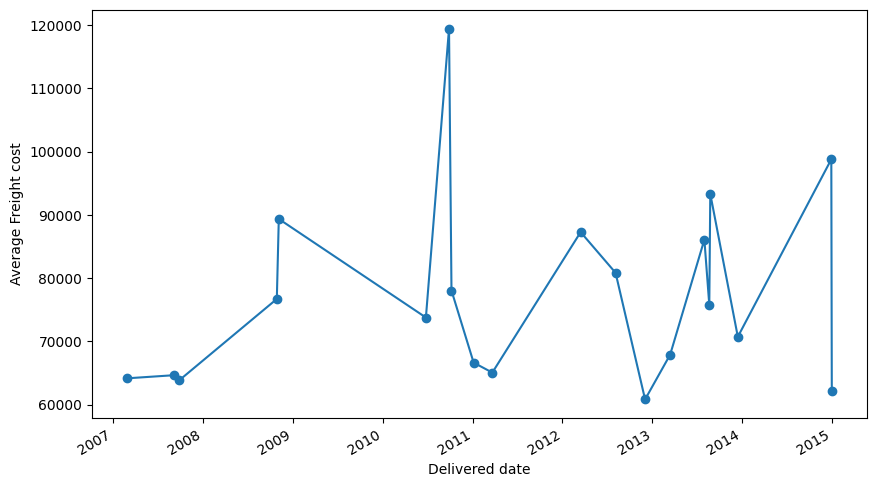

In [ ]:
plt.figure(figsize=(10,6))
date_cost.nlargest(20).plot(marker='o')
plt.xlabel('Delivered date')
plt.ylabel('Average Freight cost')

In between 2010 and 2011 the maximum freight cost is generated

Text(0, 0.5, 'Freight cost')

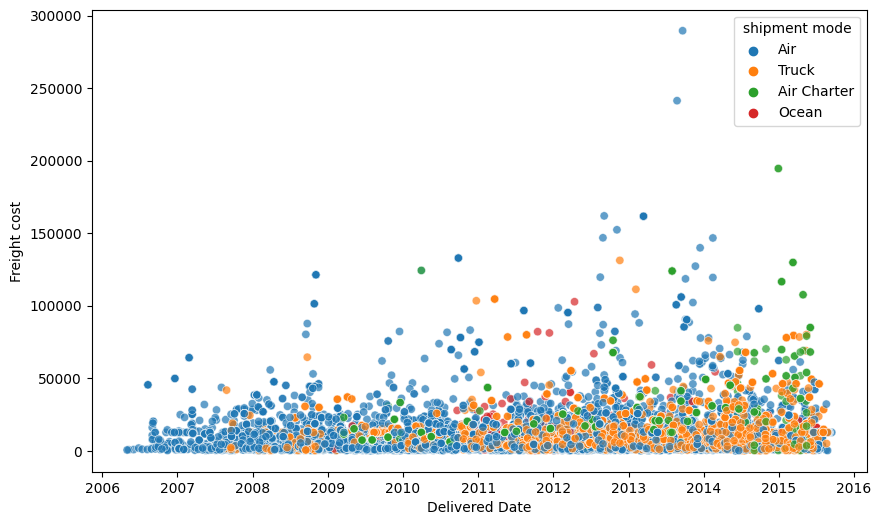

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='delivered to client date', y='freight cost (usd)',hue='shipment mode',data=data, marker='o', color='g', alpha=0.7)
plt.xlabel('Delivered Date')
plt.ylabel('Freight cost')

In the year 2006 to 2011 Air is is the most common shipment mode that choosen.But from 2011 to 2016 it changes to Truck.

Text(0, 0.5, 'Freight cost')

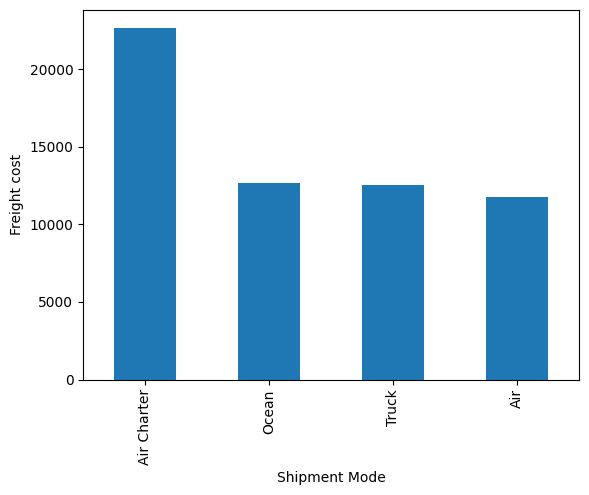

In [ ]:
data.groupby('shipment mode')['freight cost (usd)'].mean().sort_values(ascending=False).plot.bar()
plt.xlabel('Shipment Mode')
plt.ylabel('Freight cost')

###Air charter have the highest average of freight cost.

<Axes: xlabel='weight (kilograms)', ylabel='freight cost (usd)'>

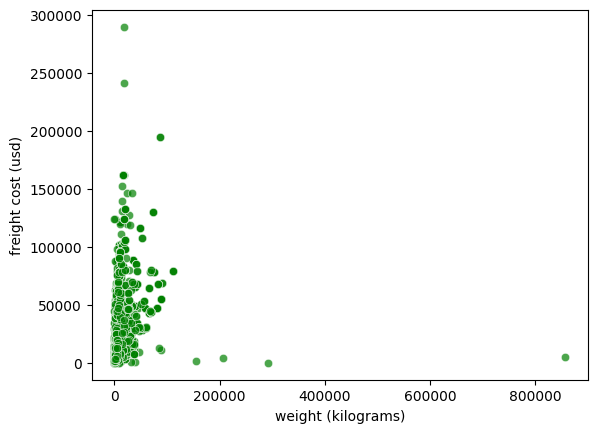

In [ ]:
sns.scatterplot(x='weight (kilograms)', y='freight cost (usd)',data=data, marker='o', color='g', alpha=0.7)

###Fulfill via vs Freight cost

Text(0, 0.5, 'Freight cost')

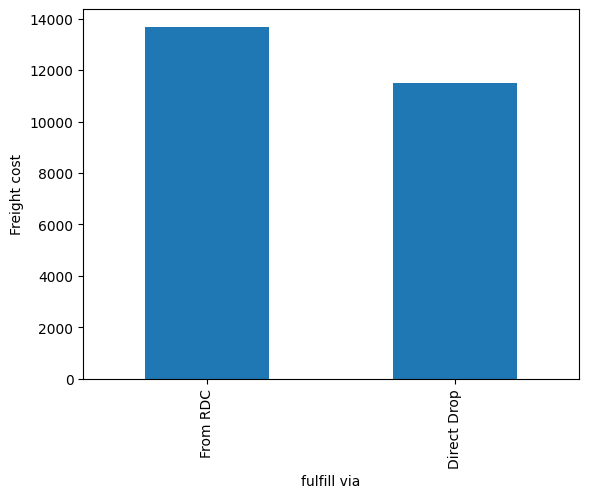

In [ ]:
data.groupby('fulfill via')['freight cost (usd)'].mean().sort_values(ascending=False).plot.bar()
plt.xlabel('fulfill via')
plt.ylabel('Freight cost')

Transportation of products through regional distribution center have more average freight cost than direct drop

<ipython-input-193-3f7a331f6503>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f3['avg_freight'] = f3['freight cost (usd)']/f3['weight (kilograms)']


Text(0, 0.5, 'freight cost per weight kg')

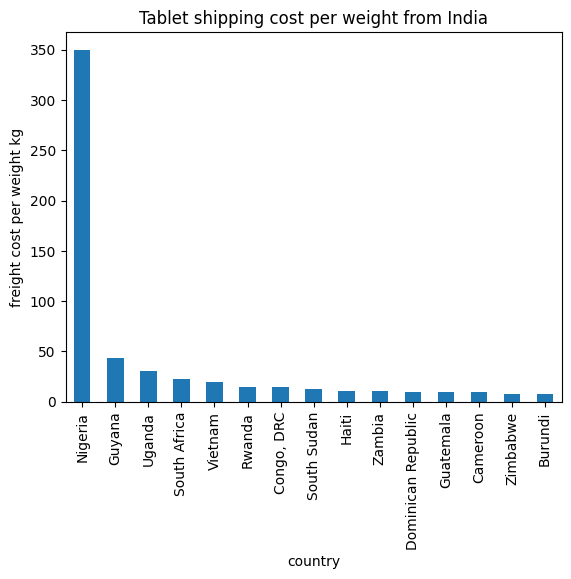

In [ ]:
d_filter = ["Tablet"]
f3 = ind[ind['dosage form'].isin(d_filter)]
f3['avg_freight'] = f3['freight cost (usd)']/f3['weight (kilograms)']
f3.groupby('country')['avg_freight'].mean().sort_values(ascending=False).nlargest(15).plot.bar()
plt.title('Tablet shipping cost per weight from India')
plt.ylabel('freight cost per weight kg')

shipping cost/kg for tablets from india is very higher for Nigeria compareed to other countries

###Handling null values

####Shipment mode

In [ ]:
y = data[data['shipment mode'].isnull()].copy()
y[['country','manufacturing site','shipment mode']]

,country,manufacturing site,shipment mode
16,Nigeria,ABBVIE GmbH & Co.KG Wiesbaden,NaN
32,South Africa,GSK Mississauga (Canada),NaN
37,South Africa,"BMS Meymac, France",NaN
43,Ethiopia,"Trinity Biotech, Plc",NaN
51,South Africa,"BMS Meymac, France",NaN
...,...,...,...
2540,Zambia,"Cipla, Goa, India",NaN
2553,Uganda,"Cipla, Goa, India",NaN
2562,Uganda,"Ranbaxy, Paonta Shahib, India",NaN
2576,Ethiopia,"Aurobindo Unit III, India",NaN


In [ ]:
def fillshipmode(text):
    if pd.notna(text['shipment mode']):
        return text['shipment mode']
    else:
        if len(data[(data['country'] == text['country']) & (data['manufacturing site'] == text['manufacturing site'])]['shipment mode'].value_counts().index.tolist()) > 0:

            return data[(data['country'] == text['country']) & (data['manufacturing site'] == text['manufacturing site'])]['shipment mode'].value_counts().index.tolist()[0]


In [ ]:
data['shipment mode'] = data.apply(fillshipmode,axis=1)

In [ ]:
df = data.dropna(subset=['shipment mode']).copy()

####Dosage

In [ ]:
import re

In [ ]:
def filldosage(text):
    if pd.notna(text):
        text = text.replace('/ml','')
        matches = re.findall(r'(\d+)/(\d+(?:/\d+)?)mg', text)
        if bool(re.match(r'^\d+mg$', text)):
            return(text.split('mg')[0])
        elif bool(re.match(r'^\d+g$', text)):
            return(text.split('g')[0])+'000'
        elif len(matches) > 0:
            return(sum([int(match[0]) for match in matches])/len(matches))
    else:
        return text

In [ ]:
df['dosage'].apply(filldosage).value_counts(dropna=False)

NaN      1733
150.0    1575
300       987
200       929
600       772
200.0     555
10        552
600.0     488
300.0     477
150       427
30.0      249
100       227
20        195
30        176
50        172
80.0      158
400       151
60.0       90
250        86
100.0      73
1          54
25         39
15         38
None       23
80         13
500.0      13
20.0       12
2000       11
500        10
40          6
60          5
125         4
Name: dosage, dtype: int64

In [ ]:
df['dosage_new'] = df['dosage'].apply(filldosage)

In [ ]:
df['dosage_new'] = df['dosage_new'].astype('float64')

In [ ]:
df['dosage_new'] = df['dosage_new'].fillna(300)

In [ ]:
df.drop('dosage',axis=1,inplace=True)

####Line item insurance

In [ ]:
#ratio of insurance to line item value
ins_ratio = df['line item insurance (usd)']/df['line item value']
ins_ratio.describe()

count    10010.000000
mean         0.001541
std          0.000392
min          0.000000
25%          0.001237
50%          0.001600
75%          0.001960
max          0.003623
dtype: float64

line item value and insurance are directly proportional.. Taking the mean value of their ratio and multiplying with item value will get the insurance amount.

In [ ]:
indx = df[df['line item insurance (usd)'].isnull()].index

In [ ]:
#filling the missing values in line item insurance
for idx in indx:
  val = df.at[idx,'line item value']*0.001541
  df.loc[idx,'line item insurance (usd)'] = val

###Encoding

####Product group

<Axes: >

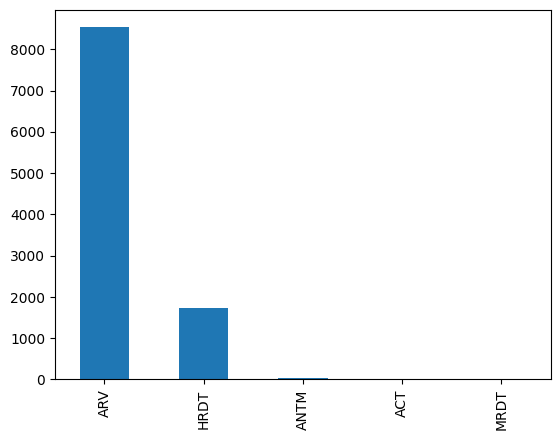

In [ ]:
df['product group'].value_counts().plot.bar()

In [ ]:
other_product = df['product group'].value_counts().to_dict()
HRDT=[]
for key,val in other_product.items():
    if val<=2000:
        HRDT.append(key)

In [ ]:
df['product group'] = df['product group'].replace(HRDT,'Other')

####Sub classification

<Axes: >

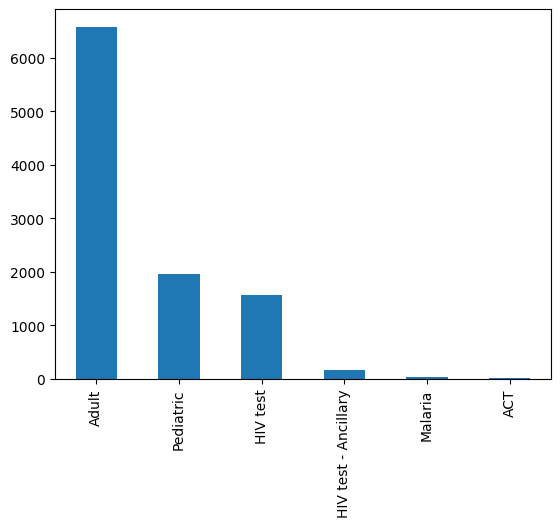

In [ ]:
df['sub classification'].value_counts().plot.bar()

In [ ]:
other_class = df['sub classification'].value_counts().to_dict()
HIV_plus=[]
for key,val in other_class.items():
    if val<=1600:
        HIV_plus.append(key)

In [ ]:
df['sub classification'] = df['sub classification'].replace(HIV_plus,'HIV+')

####Vendor

<Axes: >

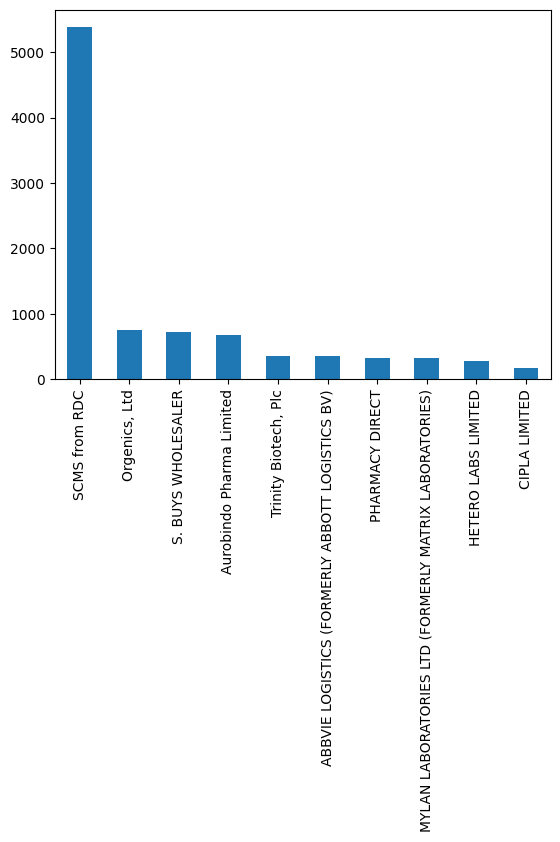

In [ ]:
df['vendor'].value_counts().head(10).plot.bar()

In [ ]:
other_vendor = df['vendor'].value_counts().to_dict()
other_catv=[]
for key,val in other_vendor.items():
    if val<=5000:
        other_catv.append(key)

In [ ]:
df['vendor'] = df['vendor'].replace(other_catv,'Other')

####Brand

<Axes: >

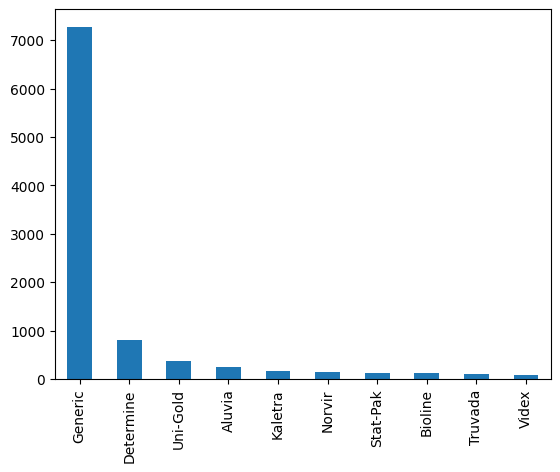

In [ ]:
df['brand'].value_counts().head(10).plot.bar()

In [ ]:
other_brand = df['brand'].value_counts().to_dict()
other_catb=[]
for key,val in other_brand.items():
    if val<=300:
        other_catb.append(key)

In [ ]:
df['brand'] = df['brand'].replace(other_catb,'Other')

####Country

<Axes: >

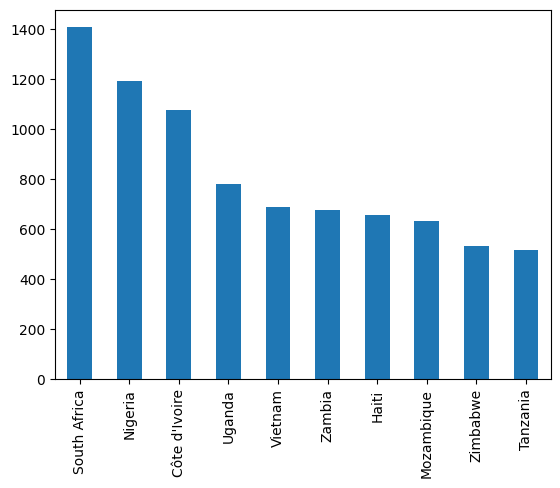

In [ ]:
df['country'].value_counts().head(10).plot.bar()

In [ ]:
other_country = df['country'].value_counts().to_dict()
other_catc=[]
for key,val in other_country.items():
    if val<=300:
        other_catc.append(key)

In [ ]:
df['country'] = df['country'].replace(other_catc,'Other')

In [ ]:
df['country'].value_counts()

South Africa     1406
Other            1384
Nigeria          1190
Côte d'Ivoire    1077
Uganda            779
Vietnam           688
Zambia            675
Haiti             655
Mozambique        631
Zimbabwe          534
Tanzania          518
Rwanda            430
Congo, DRC        333
Name: country, dtype: int64

####Manufacturing site

In [ ]:
site_country = {'India': 'India','MedMira Inc':'Other','Mepro Pharm':'India','Access BIO, L.C.':'Korea','Cyprus':'Other','Norway':'Other','Australia': 'Other','Ranbaxy':'India','Orasure Technologies, Inc':'USA','bioLytical Laboratories': 'Other','Boehringer':'Greece','Roche Basel':'Switzerland','Access Bio, L.C.':'USA','Human Diagnostic':'Germany','ABBSP':'USA','Roche Madrid':'Spain','Wiesbaden':'Germany','Alere':'Japan','Premier Medical Corporation':'India','Chembio':'USA','Trinity Biotech, Plc':'USA','Puerto Rico':'Other','CY':'Other','Biolytical Laboratories':'Other','GSK':'South Africa','USA':'USA','Gilead': 'USA','Bio-Rad Laboratories':'USA','Nashik':'India','NL':'Netherlands','Pharma':'India','Japan':'Japan','Germany':'Germany','Not Applicable':'USA','Thailand':'Thailand','Korea':'Korea','SA':'South Africa','IN':'India','UK':'UK','China':'China','IT':'Italy','US':'USA','Canada':'Other','Poland':'Poland','France':'France'}

In [ ]:
#creating a new column manufacturing country from manufacturing site
df['manufacturing country'] = df['manufacturing site']
for key,country in site_country.items():
  for site in df['manufacturing country']:
    if key in site:
      df['manufacturing country'].replace(site,country,inplace = True)

####Dosage form

In [ ]:
#merging all similar dosage forms
d_form = {'Oral': 'Oral Medicine','oral': 'Oral Medicine','Tablet':'Tablet','Test kit':'Test Kit','tablet':'Tablet','capsules':'Capsule'}
for key,dos in d_form.items():
  for dose in df['dosage form']:
    if key in dose:
      df['dosage form'].replace(dose,dos,inplace = True)

###Detecting Outliers

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            10324 non-null  int64         
 1   project code                  10324 non-null  object        
 2   pq #                          10324 non-null  object        
 3   po / so #                     10324 non-null  object        
 4   asn/dn #                      10324 non-null  object        
 5   country                       10324 non-null  object        
 6   managed by                    10324 non-null  object        
 7   fulfill via                   10324 non-null  object        
 8   vendor inco term              10324 non-null  object        
 9   shipment mode                 10300 non-null  object        
 10  pq first sent to client date  10324 non-null  object        
 11  po sent to vendor date      

Text(0.5, 0, 'Freight cost')

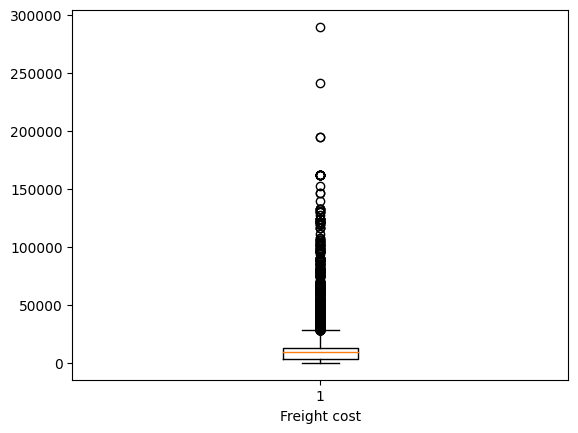

In [ ]:
plt.boxplot(data['freight cost (usd)']);
plt.xlabel('Freight cost')

Text(0.5, 0, 'weight (kilograms)')

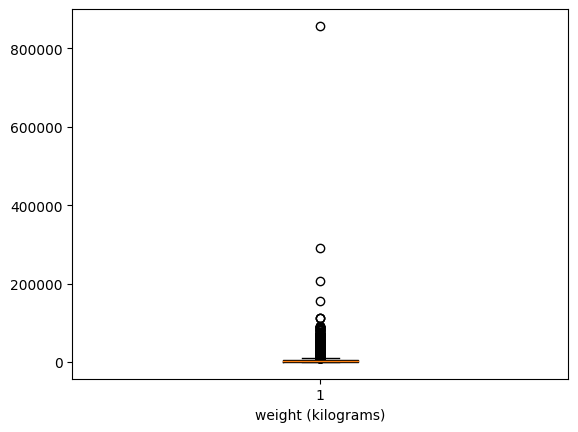

In [ ]:
plt.boxplot(data['weight (kilograms)']);
plt.xlabel('weight (kilograms)')

Text(0.5, 0, 'unit price')

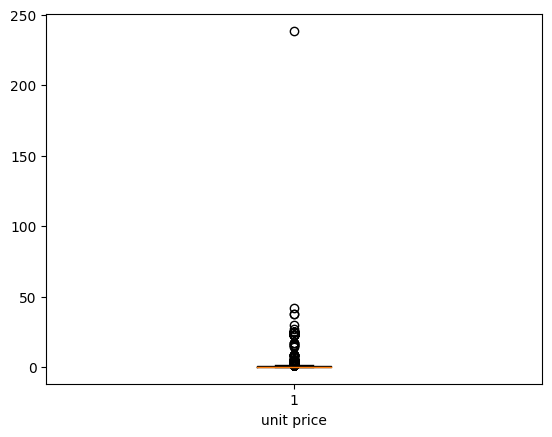

In [ ]:
plt.boxplot(data['unit price']);
plt.xlabel('unit price')

Text(0.5, 0, 'pack price')

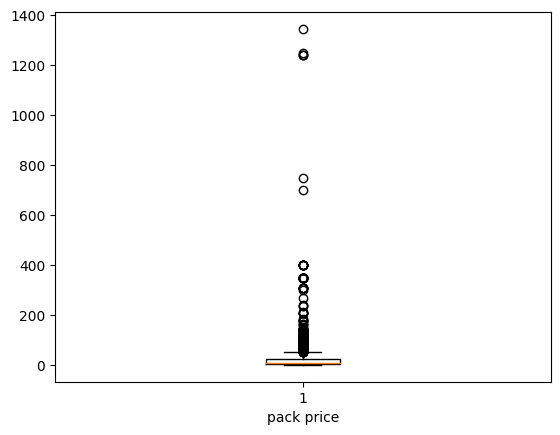

In [ ]:
plt.boxplot(data['pack price']);
plt.xlabel('pack price')

Text(0.5, 0, 'line item value')

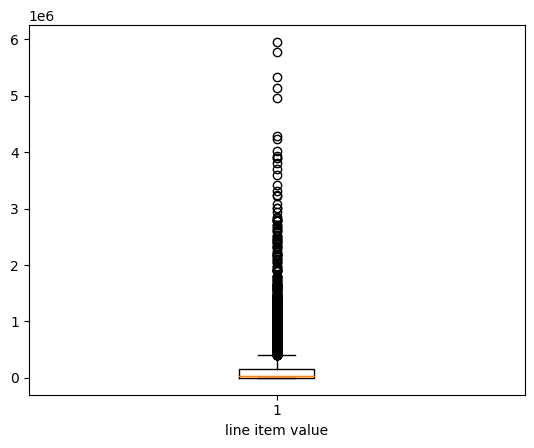

In [ ]:
plt.boxplot(data['line item value']);
plt.xlabel('line item value')

Text(0.5, 0, 'line item quantity')

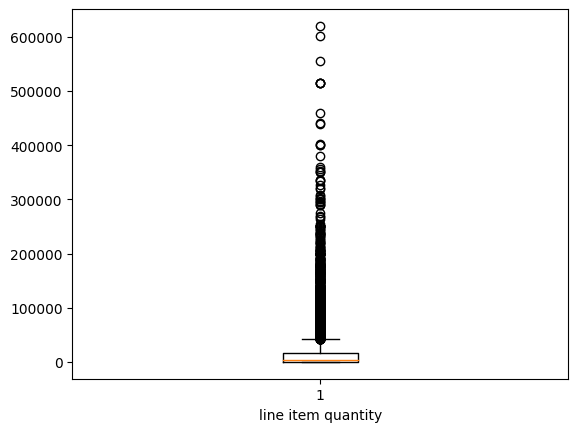

In [ ]:
plt.boxplot(data['line item quantity']);
plt.xlabel('line item quantity')

Text(0.5, 0, 'unit of measure (per pack)')

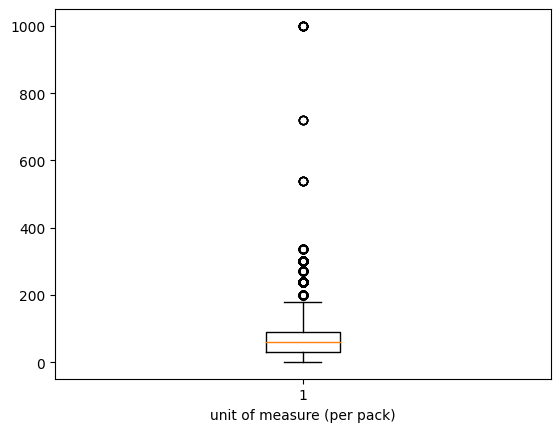

In [ ]:
plt.boxplot(data['unit of measure (per pack)']);
plt.xlabel('unit of measure (per pack)')

In [ ]:
df.iloc[1]

id                                                                              3
project code                                                           108-VN-T01
pq #                                                               Pre-PQ Process
po / so #                                                                 SCMS-13
asn/dn #                                                                   ASN-85
country                                                                   Vietnam
managed by                                                               PMO - US
fulfill via                                                           Direct Drop
vendor inco term                                                              EXW
shipment mode                                                                 Air
pq first sent to client date                                       Pre-PQ Process
po sent to vendor date                                          Date Not Captured
scheduled delive

In [ ]:
df2 = df.drop(['id','po / so #','project code','pq #','asn/dn #','managed by','vendor','fulfill via','vendor inco term','pq first sent to client date',
         'po sent to vendor date', 'scheduled delivery date', 'delivered to client date','delivery recorded date','sub classification','item description',
         'molecule/test type','manufacturing site','delay','dosage_new','product group','brand','dosage form'],axis=1).copy()

In [ ]:
data.iloc[1]

id                                                                              3
project code                                                           108-VN-T01
pq #                                                               Pre-PQ Process
po / so #                                                                 SCMS-13
asn/dn #                                                                   ASN-85
country                                                                   Vietnam
managed by                                                               PMO - US
fulfill via                                                           Direct Drop
vendor inco term                                                              EXW
shipment mode                                                                 Air
pq first sent to client date                                       Pre-PQ Process
po sent to vendor date                                          Date Not Captured
scheduled delive

In [ ]:
df2.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# country encoding

In [ ]:
cols = ['country','manufacturing country']
all_countries = np.array(list(set(list(df2[cols[0]].unique()) + list(df2[cols[1]].unique()))))

le_country = LabelEncoder()
le_country.fit(all_countries)

LabelEncoder()

In [ ]:
df2[cols[0]] = le_country.transform(df2[cols[0]])
df2[cols[1]] = le_country.transform(df2[cols[1]])

In [ ]:
df2

,country,shipment mode,unit of measure (per pack),line item quantity,line item value,pack price,unit price,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd),manufacturing country
0,2,Air,30,19,551.00,29.00,0.97,True,13.000000,780.34000,0.849091,7
1,24,Air,240,1000,6200.00,6.20,0.03,True,358.000000,4521.50000,9.554200,7
2,2,Air,100,500,40000.00,80.00,0.80,True,171.000000,1653.78000,61.640000,4
3,24,Air,60,31920,127360.80,3.99,0.07,True,1855.000000,16007.06000,196.262993,7
4,24,Air,60,38000,121600.00,3.20,0.05,True,7590.000000,45450.08000,187.385600,7
...,...,...,...,...,...,...,...,...,...,...,...,...
10295,26,Truck,60,166571,599655.60,3.60,0.06,False,25880.000000,46111.55000,705.790000,7
10296,2,Truck,60,21072,137389.44,6.52,0.11,False,4426.000000,14734.92000,161.710000,7
10297,25,Truck,30,514526,5140114.74,9.99,0.33,False,4464.293407,12641.90846,5284.040000,7
10298,26,Truck,60,17465,113871.80,6.52,0.11,True,1392.000000,12641.90846,134.030000,7


# onehot encoding shipment mode

In [ ]:
encode_shipment = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder_df = encode_shipment.fit_transform(df[['shipment mode']])

col_names = ['shipmode_Air','Shipmode_AirCharter','shipmode_Ocean','shipmode_Truck']
df_shipment = pd.DataFrame(encoder_df, columns=col_names)
data = df2.join(df_shipment)
data.drop(['shipment mode'],axis = 1,inplace =True)

In [ ]:
data['first line designation'] = data['first line designation'].astype(int)

In [ ]:
data

,country,unit of measure (per pack),line item quantity,line item value,pack price,unit price,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd),manufacturing country,shipmode_Air,Shipmode_AirCharter,shipmode_Ocean,shipmode_Truck
0,2,30,19,551.00,29.00,0.97,1,13.000000,780.34000,0.849091,7,1.0,0.0,0.0,0.0
1,24,240,1000,6200.00,6.20,0.03,1,358.000000,4521.50000,9.554200,7,1.0,0.0,0.0,0.0
2,2,100,500,40000.00,80.00,0.80,1,171.000000,1653.78000,61.640000,4,1.0,0.0,0.0,0.0
3,24,60,31920,127360.80,3.99,0.07,1,1855.000000,16007.06000,196.262993,7,1.0,0.0,0.0,0.0
4,24,60,38000,121600.00,3.20,0.05,1,7590.000000,45450.08000,187.385600,7,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,26,60,166571,599655.60,3.60,0.06,0,25880.000000,46111.55000,705.790000,7,0.0,0.0,0.0,1.0
10296,2,60,21072,137389.44,6.52,0.11,0,4426.000000,14734.92000,161.710000,7,0.0,0.0,0.0,1.0
10297,25,30,514526,5140114.74,9.99,0.33,0,4464.293407,12641.90846,5284.040000,7,0.0,0.0,0.0,1.0
10298,26,60,17465,113871.80,6.52,0.11,1,1392.000000,12641.90846,134.030000,7,0.0,0.0,0.0,1.0


In [ ]:
encode_shipment.categories_, le_country.classes_

([array(['Air', 'Air Charter', 'Ocean', 'Truck'], dtype=object)],
 array(['China', 'Congo, DRC', "Côte d'Ivoire", 'France', 'Germany',
        'Greece', 'Haiti', 'India', 'Italy', 'Japan', 'Korea',
        'Mozambique', 'Netherlands', 'Nigeria', 'Other', 'Rwanda',
        'South Africa', 'Spain', 'Switzerland', 'Tanzania', 'Thailand',
        'UK', 'USA', 'Uganda', 'Vietnam', 'Zambia', 'Zimbabwe'],
       dtype='<U13'))

In [ ]:
data.describe()

,country,unit of measure (per pack),line item quantity,line item value,pack price,unit price,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd),manufacturing country,shipmode_Air,Shipmode_AirCharter,shipmode_Ocean,shipmode_Truck
count,10300.000000,10300.000000,10300.000000,1.030000e+04,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000
mean,14.774757,77.919126,18364.786893,1.578909e+05,21.887266,0.608943,0.680874,4470.543839,12656.203086,237.586621,8.313689,0.612136,0.065049,0.036019,0.286796
std,7.396536,76.573094,40073.230357,3.456320e+05,45.633260,3.259346,0.466161,12282.279722,16553.831899,495.549025,3.684355,0.487287,0.246623,0.186347,0.452287
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,30.000000,406.500000,4.311688e+03,4.120000,0.080000,0.000000,400.750000,3325.540000,6.607500,7.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,60.000000,3007.500000,3.050978e+04,9.300000,0.160000,1.000000,2127.500000,9490.825000,47.275000,7.000000,1.000000,0.000000,0.000000,0.000000
75%,23.000000,90.000000,17108.250000,1.667243e+05,23.500000,0.470000,1.000000,4464.293407,13215.280000,250.358125,7.000000,1.000000,0.000000,0.000000,1.000000
max,26.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,1.000000,857354.000000,289653.200000,7708.440000,22.000000,1.000000,1.000000,1.000000,1.000000


# Minmax scaling

In [ ]:
min_max = MinMaxScaler()
data.iloc[:, [1,2,3,4,5,7,9]] = min_max.fit_transform(data.iloc[:, [1,2,3,4,5,7,9]])

In [ ]:
data

,country,unit of measure (per pack),line item quantity,line item value,pack price,unit price,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd),manufacturing country,shipmode_Air,Shipmode_AirCharter,shipmode_Ocean,shipmode_Truck
0,2,0.029029,0.000029,0.000093,0.021551,0.004065,1,0.000015,780.34000,0.000110,7,1.0,0.0,0.0,0.0
1,24,0.239239,0.001611,0.001042,0.004607,0.000126,1,0.000418,4521.50000,0.001239,7,1.0,0.0,0.0,0.0
2,2,0.099099,0.000805,0.006720,0.059451,0.003352,1,0.000199,1653.78000,0.007996,4,1.0,0.0,0.0,0.0
3,24,0.059059,0.051482,0.021398,0.002965,0.000293,1,0.002164,16007.06000,0.025461,7,1.0,0.0,0.0,0.0
4,24,0.059059,0.061289,0.020430,0.002378,0.000210,1,0.008853,45450.08000,0.024309,7,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,26,0.059059,0.268662,0.100749,0.002675,0.000251,0,0.030186,46111.55000,0.091561,7,0.0,0.0,0.0,1.0
10296,2,0.059059,0.033986,0.023083,0.004845,0.000461,0,0.005162,14734.92000,0.020978,7,0.0,0.0,0.0,1.0
10297,25,0.029029,0.829882,0.863596,0.007424,0.001383,0,0.005207,12641.90846,0.685488,7,0.0,0.0,0.0,1.0
10298,26,0.059059,0.028168,0.019132,0.004845,0.000461,1,0.001624,12641.90846,0.017387,7,0.0,0.0,0.0,1.0


In [ ]:
data.describe()

,country,unit of measure (per pack),line item quantity,line item value,pack price,unit price,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd),manufacturing country,shipmode_Air,Shipmode_AirCharter,shipmode_Ocean,shipmode_Truck
count,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000
mean,14.774757,0.076996,0.029619,0.026527,0.016265,0.002552,0.680874,0.005214,12656.203086,0.030822,8.313689,0.612136,0.065049,0.036019,0.286796
std,7.396536,0.076650,0.064634,0.058070,0.033912,0.013657,0.466161,0.014326,16553.831899,0.064287,3.684355,0.487287,0.246623,0.186347,0.452287
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.029029,0.000654,0.000724,0.003062,0.000335,0.000000,0.000467,3325.540000,0.000857,7.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.059059,0.004849,0.005126,0.006911,0.000670,1.000000,0.002481,9490.825000,0.006133,7.000000,1.000000,0.000000,0.000000,0.000000
75%,23.000000,0.089089,0.027592,0.028012,0.017464,0.001969,1.000000,0.005207,13215.280000,0.032478,7.000000,1.000000,0.000000,0.000000,1.000000
max,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,289653.200000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000


Splitting dependent and independent varibales

In [ ]:
x = data.drop(['freight cost (usd)'],axis = 1)
y = data['freight cost (usd)']

Performing Train Test split of the data

In [ ]:
x

,country,unit of measure (per pack),line item quantity,line item value,pack price,unit price,first line designation,weight (kilograms),line item insurance (usd),manufacturing country,shipmode_Air,Shipmode_AirCharter,shipmode_Ocean,shipmode_Truck
0,2,0.029029,0.000029,0.000093,0.021551,0.004065,1,0.000015,0.000110,7,1.0,0.0,0.0,0.0
1,24,0.239239,0.001611,0.001042,0.004607,0.000126,1,0.000418,0.001239,7,1.0,0.0,0.0,0.0
2,2,0.099099,0.000805,0.006720,0.059451,0.003352,1,0.000199,0.007996,4,1.0,0.0,0.0,0.0
3,24,0.059059,0.051482,0.021398,0.002965,0.000293,1,0.002164,0.025461,7,1.0,0.0,0.0,0.0
4,24,0.059059,0.061289,0.020430,0.002378,0.000210,1,0.008853,0.024309,7,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,26,0.059059,0.268662,0.100749,0.002675,0.000251,0,0.030186,0.091561,7,0.0,0.0,0.0,1.0
10296,2,0.059059,0.033986,0.023083,0.004845,0.000461,0,0.005162,0.020978,7,0.0,0.0,0.0,1.0
10297,25,0.029029,0.829882,0.863596,0.007424,0.001383,0,0.005207,0.685488,7,0.0,0.0,0.0,1.0
10298,26,0.059059,0.028168,0.019132,0.004845,0.000461,1,0.001624,0.017387,7,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state = 42,test_size = 0.20)

In [ ]:
print('No. of rows and columns in x_train : ', x_train.shape)
print('No. of rows and columns in x_test : ', x_test.shape)
print('No. of rows and columns in y_train : ', y_train.shape)
print('No. of rows and columns in y_test : ', y_test.shape)

No. of rows and columns in x_train :  (8240, 14)
No. of rows and columns in x_test :  (2060, 14)
No. of rows and columns in y_train :  (8240,)
No. of rows and columns in y_test :  (2060,)


*** *italicized text*Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score, mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso
LRmodel = LinearRegression()
model = LRmodel.fit(x_train,y_train)

In [ ]:
y_pred = LRmodel.predict(x_test)

In [ ]:
#print('accuracy_score = ',accuracy_score(y_test,y_pred))
print('MSE = ',mean_squared_error(y_test,y_pred)**0.5)
print('MAE = ',mean_absolute_error(y_test,y_pred))
print('r2_score = ',r2_score(y_pred,y_test))

MSE =  14924.871503219885
MAE =  8350.338332015714
r2_score =  -2.1587447455990336


***Lasso Regression***

In [ ]:
lasso = Lasso(alpha = 10)
Lasso = lasso.fit(x_train,y_train)

In [ ]:
y_prd = Lasso.predict(x_test)

In [ ]:
print('MSE = ',mean_squared_error(y_test,y_prd)**0.5)
print('MAE = ',mean_absolute_error(y_test,y_prd))
print('r2_score = ',r2_score(y_prd,y_test))

MSE =  14297.251786903036
MAE =  8347.01279389871
r2_score =  -3.5522006226147775


In [ ]:
#plt.figure(figsize =(12,7))
#plt.scatter(y_test,y_pred)
#plt.show

In [ ]:
data.iloc[1]

***RandomForest Regressor***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500).fit(x_train,y_train)

In [ ]:
rf_pred = rf.predict(x_test)

In [ ]:
print('MSE = ',mean_squared_error(y_test,rf_pred)**0.5)
print('MAE = ',mean_absolute_error(y_test,y_pred))
print('r2_score = ',r2_score(rf_pred,y_test))

MSE =  7990.220323630115
MAE =  8350.338332015714
r2_score =  0.6557662418787578


hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features = ['sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(start=10,stop=1000,num=10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]

In [ ]:
random_grid = {'n_estimators' : n_estimators,
               'max_features' :max_features,
               'max_depth' : max_depth,
               'min_samples_split' :min_samples_split,
               'min_samples_leaf' : min_samples_leaf}

In [ ]:
rf = RandomForestRegressor()
rf_randomcv = RandomizedSearchCV(estimator= rf,
                                 param_distributions= random_grid,
                                 cv = 5,
                                 random_state = 100)
rf_randomcv.fit(x_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
rf_randomcv.best_params_

best params : n_estimators= 200, min_samples_split= 2, min_samples_leaf= 2, max_depth = 780, max_features = 'sqrt'

In [ ]:
rf_re = RandomForestRegressor(n_estimators= 200,
 min_samples_split= 2,
 min_samples_leaf= 2,
  max_depth = 780,
 max_features = 'sqrt')

In [ ]:
rf_re.fit(x_train,y_train)

In [ ]:
r_pred = rf_re.predict(x_test)

In [ ]:
print('MSE = ', mean_squared_error(y_test,r_pred)**0.5)
print('r2_score = ',r2_score(r_pred,y_test))

In [ ]:
print('MAE = ', mean_absolute_error(y_test,r_pred))

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor()

In [ ]:
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)


In [ ]:
print('MSE = ', mean_squared_error(y_test,pred)**0.5)
print('MAE = ', mean_absolute_error(y_test,pred))
print('r2_score = ',r2_score(pred,y_test))

MSE =  8227.982455476704
MAE =  4145.174962977363
r2_score =  0.671122548472605


In [ ]:
param_grid = {'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.001, 0.01],
    'reg_lambda': [0, 0.001, 0.01],
    'scale_pos_weight': [1, 2, 5]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_rs = XGBRegressor()
rf_xgb = RandomizedSearchCV(estimator= xgb_rs,
                                 param_distributions= param_grid,
                                 cv = 5,scoring='neg_mean_squared_error')
rf_xgb.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 6, 9],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'reg_alpha': [0, 0.001, 0.01],
                                        'reg_lambda': [0, 0.001, 0.01],
                                        'scale_pos_weight': [1, 2, 5],
                                        'subsample': [0.7, 0.8, 0.9]},
                   scoring='neg_mean_squared_error')

In [ ]:
xgb_best = XGBRegressor(subsample= 0.9,scale_pos_weight= 2, reg_lambda= 0.01,reg_alpha= 0.01,
                        n_estimators= 200,min_child_weight= 5,max_depth= 6,learning_rate= 0.1,
                        gamma= 0.2,colsample_bytree= 0.8)

In [ ]:
xgb_best.fit(x_train,y_train)
pred = xgb_best.predict(x_test)

In [ ]:
print('MSE = ', mean_squared_error(y_test,pred)**0.5)
print('MAE = ', mean_absolute_error(y_test,pred))
print('r2_score = ',r2_score(pred,y_test))

In [ ]:
import pickle

with open('xgb_model.pickle', 'wb') as f:
    pickle.dump(xgb, f)
f.close()

with open('encode_shipment.pickle', 'wb') as f:
    pickle.dump(encode_shipment, f)
f.close()

with open('le_country.pickle', 'wb') as f:
    pickle.dump(le_country, f)
f.close()

with open('minmax.pickle', 'wb') as f:
    pickle.dump(min_max, f)
f.close()